어텐션 메커니즘 (Attention Mechanism)  
- seq2seq 모델은 인코더에서 입력 시퀀스를 컨텍스트 벡터라는 하나의 고정된 크기의 벡터 표현으로 압축하고 디코더는 이 컨텍스트 벡터를 통해서 출력 시퀀스를 만들어내는 모델
- RNN에 기반한 seq2seq 모델에는 크게 두 가지 문제가 있음
    - 하나의 고정된 크기의 벡터에 모든 정보를 압축하니 정보 손실이 발생함
    - RNN의 고질적인 문제인 기울기 소실(vanishing gradient) 문제가 존재함
- 결국 기계 번역 분야에서 입력 문장이 길면 번역 품질이 떨어지는 현상으로 나타남. 이를 위한 대안으로 입력 시퀀스가 길어지면 출력 시퀀스의 정확도가 떨어지는 것을 보정해주기 위한 기법이 어텐션 메커니즘임

어텐션(Attention)의 아이디어  
- 기본 아이디어는 디코더에서 출력 단어를 예측하는 매 시점(time step)마다, 인코더에서의 전체 입력 문장을 다시 한 번 참고한다는 점  
- 전체 입력 문장을 전부 다 동일한 비율로 참고하는 것이 아니라, 해당 시점에서 예측해야 할 단어와 연관이 있는 입력 단어 부분을 좀 더 집중(attention)해서 보게 됨  

어텐션 함수(Attention Function)  
- Key-Value로 구성되는 딕셔너리(Dict)를 통해 어텐션 함수 설명  

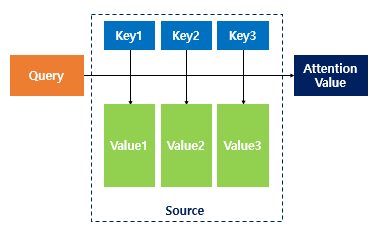  
  
Attention(Q, K, V) = Attention Value  
Q = Query : t 시점의 디코더 셀에서의 은닉 상태  
K = Keys : 모든 시점의 인코더 셀의 은닉 상태들  
V = Values : 모든 시점의 인코더 셀의 은닉 상태들  

- 어텐션 함수는 주어진 '쿼리(Query)'에 대해서 모든 '키(Key)'와의 유사도를 각각 구함
- 이 유사도를 키와 맵핑 되어 있는 각각의 '값(Value)'에 반영함
- 유사도가 반영된 '값(Value)'을 모두 더해서 리턴함
    - 해당 값이 어텐션 값(Attention Value)임

닷-프로덕트 어텐션(Dot-Product Attention)  
seq2seq에서 사용되는 어텐션 중에서 닷-프로덕트 어텐션과 다른 어텐션의 차이는 
주로 중간 수식의 차이로 메커니즘 자체는 거의 유사함  

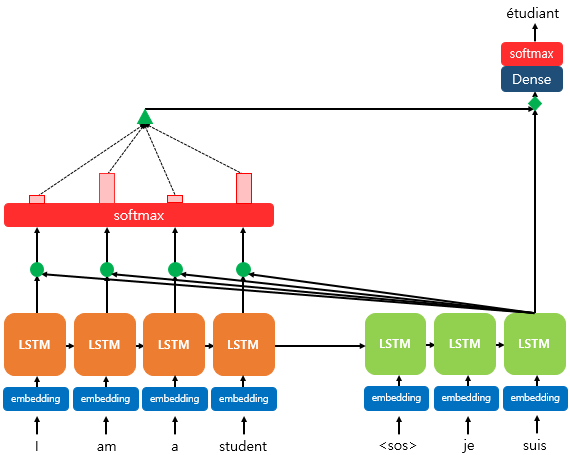  

- 디코더의 세번째 LSTM 셀은 출력 단어를 예측하기 위해서 인코더의 모든 입력 단어들의 정보를 다시 한번 참고함
- 주목할 것은 인코더의 소프트맥스 함수
- 소프트맥스 함수를 통해 나온 결과값은 I, am, a, student 단어 각각이 출력 단어를 예측할 때 얼마나 도움이 되는지의 정도를 수치화한 값
    - 위의 그림에서는 빨간 직사각형의 크기로 소프트맥스 함수의 결과값의 크기를 표현. 직사각형의 크기가 클 수록 도움이 되는 정도의 크기가 큼
    - 각 입력 단어가 디코더의 예측에 도움이 되는 정도가 수치화하여 측정되면 이를 하나의 정보로 담아서 디코더로 전송됨. 위의 그림에서는 초록색 삼각형

1. 어텐션 스코어(Attention Score)를 구함

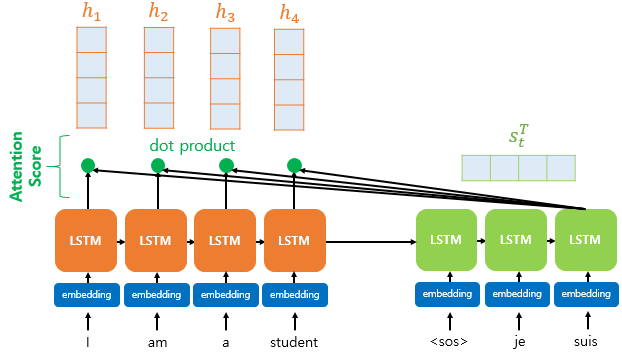  

- 인코더의 시점(time step) 각각 1, 2, ... N 일 때 인코더의 은닉 상태(hidden state)는 각각 h_1, h_2, ... h_N .
- 디코더의 현재 시점(time step) t에서의 디코더의 은닉 상태(hidden state)를 s_t 라고 하고 여기서는 인코더의 은닉 상태와 디코더의 은닉 상태의 차원이 같다고 가정.
    - 위의 그림의 경우에는 인코더의 은닉 상태와 디코더의 은닉 상태가 동일하게 차원이 4임
- 시점 t에서 출력 단어를 예측하기 위해서 디코더의 셀은 두 개의 입력값을 필요로 하는데, 바로 이전 시점인 t-1의 은닉 상태와 이전 시점 t-1에 나온 출력 단어
- 어텐션 메커니즘에서는 출력 단어 예측에 또 다른 값을 필요로 하는데 바로 어텐션 값(Attention Value)이라는 새로운 값
- t번째 단어를 예측하기 위한 어텐션 값을 a_t이라고 정의함
- 지금부터 배우는 과정은 a_t를 구하기 위한 여정. 그리고 그 여정의 첫 걸음은 바로 어텐션 스코어(Attention Score)를 구하는 일.
- 어텐션 스코어란 현재 디코더의 시점 t에서 단어를 예측하기 위해, 인코더의 모든 은닉 상태 각각이 디코더의 현 시점의 은닉 상태 s_t와 얼마나 유사한지를 판단하는 스코어 값
- 닷-프로덕트 어텐션에서는 이 스코어 값을 구하기 위해 s_t를 전치(transpose)하고 각 은닉 상태와 내적(dot product)을 수행함. 즉, 모든 어텐션 스코어 값은 스칼라.
- s_t과 인코더의 i번째 은닉 상태의 어텐션 스코어의 계산 방법은 아래와 같음  

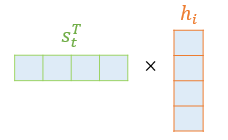  

2. 소프트맥스(softmax) 함수를 통해 어텐션 분포(Attention Distribution)를 구함  

- e^t에 소프트맥스 함수를 적용하여, 모든 값을 합하면 1이 되는 확률 분포를 얻어냄
- 이를 어텐션 분포(Attention Distribution)라고 하며, 각각의 값은 어텐션 가중치(Attention Weight)라고 함
- 예를 들어 소프트맥스 함수를 적용하여 얻은 출력값인 I, am, a, student의 어텐션 가중치를 각각 0.1, 0.4, 0.1, 0.4라고 합시다. 이들의 합은 1입니다. 위의 그림은 각 인코더의 은닉 상태에서의 어텐션 가중치의 크기를 직사각형의 크기를 통해 시각화하였습니다. 즉, 어텐션 가중치가 클수록 직사각형이 큽니다.

디코더의 시점 t에서의 어텐션 가중치의 모음값인 어텐션 분포를 a^t 이라고 할 때, a^t을 식으로 정의하면 다음과 같음  
$α^{t} = softmax(e^{t})$  

3. 각 인코더의 어텐션 가중치와 은닉 상태를 가중합하여 어텐션 값(Attention Value)을 구함  

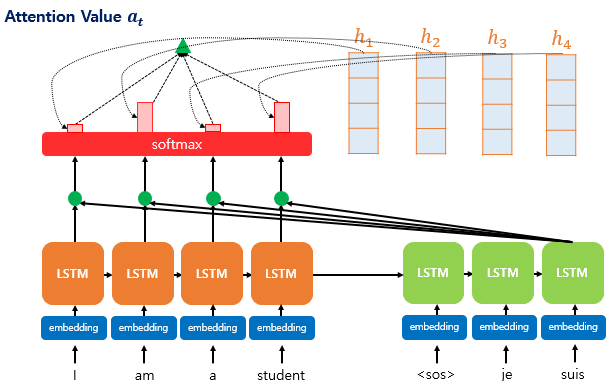  

- 이제 준비해온 정보들을 하나로 합치는 단계
- 어텐션의 최종 결과값을 얻기 위해서 각 인코더의 은닉 상태와 어텐션 가중치값들을 곱하고, 최종적으로 모두 더함
    - 요약하면 가중합(Weighted Sum)을 진행합
- 아래는 어텐션의 최종 결과. 즉, 어텐션 함수의 출력값인 어텐션 값(Attention Value) a_t에 대한 식을 보여줌

$a_{t}=\sum_{i=1}^{N} α_{i}^{t}h_{i}$

- 어텐션 값 a_t 은 종종 인코더의 문맥을 포함하고 있다고하여, 컨텍스트 벡터(context vector)라고도 불림

4. 어텐션 값과 디코더의 t 시점의 은닉 상태를 연결 (Concatenate)

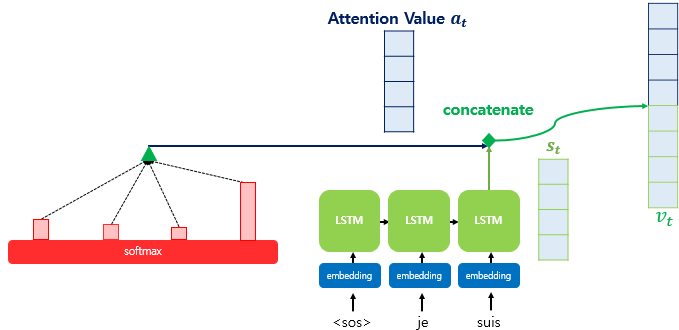  

- 어텐션 값이 구해지면 어텐션 메커니즘은 a_t를 s_t와 결합(concatenate)하여 하나의 벡터로 만드는 작업을 수행
    - 이를 v_t라고 정의
- 이 v_t를 y_hat 예측 연산의 입력으로 사용하므로서 인코더로부터 얻은 정보를 활용하여 y_hat를 좀 더 잘 예측할 수 있게 됨

5. 출력층 연산의 입력이 되는 s_hat_t를 계산  

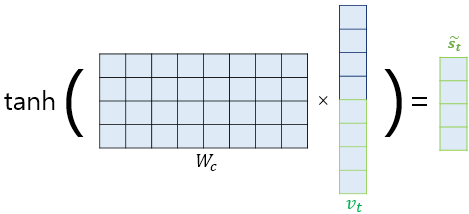  

- 논문에서는 v_t를 바로 출력층으로 보내기 전에 신경망 연산을 한 번 더 추가함
- 가중치 행렬과 곱한 후에 하이퍼볼릭탄젠트 함수를 지나도록 하여 출력층 연산을 위한 새로운 벡터인 s_hat_t를 얻음
- 어텐션 메커니즘을 사용하지 않는 seq2seq에서는 출력층의 입력이 t시점의 은닉 상태인 s_t였던 반면, 어텐션 메커니즘에서는 출력층의 입력이 s_hat_t가 되는 것

- 식으로 표현하면 W_c는 학습 가능한 가중치 행렬, b_c는 편향  
$$\tilde{s}_{t} = \tanh(\mathbf{W_{c}}[{a}_t;{s}_t] + b_{c})$$

6. $\tilde{{s}}_{t}$를 출력층의 입력으로 사용  

- $\tilde{{s}}_{t}$를 출력층의 입력으로 사용하여 예측 벡터를 얻음
$$\widehat{y}_t = \text{Softmax}\left( W_y\tilde{s}_t + b_y \right)$$

다양한 종류의 어텐션(Attention)  
닷-프로덕트 어텐션과 다른 어텐션들의 차이는 중간 수식의 차이. 여기서 말하는 중간 수식은 어텐션 스코어 함수  
위에서 배운 어텐션이 닷-프로덕트 어텐션인 이유는 어텐션 스코어를 구하는 방법이 내적이었기 때문  

- dot : $score(s_{t},\ h_{i}) = s^{T}_{t}h_{i}$
- scaled dot : $score(s_{t},\ h_{i}) = \frac{s^{T}_{t}h_{i}}{\sqrt{n}}$
- general : $score(s_{t},\ h_{i}) = s^{T}_{t}W_{a}h_{i}$
- concat : $score(s_{t},\ h_{i}) = W_{a}^{T}\ tanh(W_{b}[s_{t};h_{i}]), score(s_{t},\  h_{i}) = W_{a}^{T}\ tanh(W_{b}s_{t}+W_{c} h_{i})$
- location - base : $α_{t} = softmax(W_{a}s_{t})$

위에서 s_t는 Query, h_i는 Keys, W_a와 W_b는 학습 가능한 가중치 행렬  
이름이 dot이라고 붙여진 스코어 함수가 닷 프로덕트 어텐션. 이 어텐션은 제안한 사람의 이름을 따서 루옹(Luong) 어텐션이라고도 함  
concat이라는 이름의 어텐션은 만든 사람의 이름을 따서 바다나우(Bahdanau) 어텐션이라고 함  

바다나우 어텐션 함수(Bahdanau Attention Function)  
Attention(Q, K, V) = Attention Value  
- t = 어텐션 메커니즘이 수행되는 디코더 셀의 현재 시점을 의미.  
- Q = Query : t-1 시점의 디코더 셀에서의 은닉 상태
- K = Keys : 모든 시점의 인코더 셀의 은닉 상태들
- V = Values : 모든 시점의 인코더 셀의 은닉 상태들  

바다나우 어텐션의 연산 순서  

1. 어텐션 스코어 (Attention Score)를 구함  

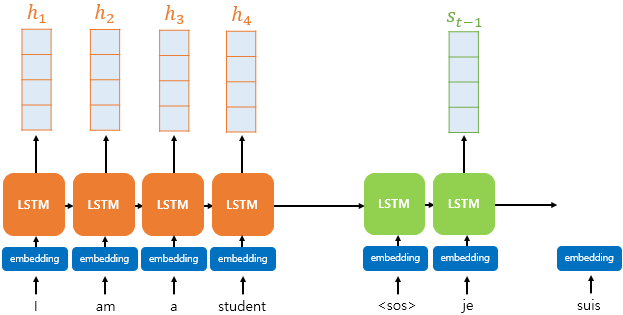  

- 인코더의 시점(time step) : 1, 2, ... N
- 인코더의 은닉 상태(hidden state) : h1, h2, ... h_N
- 디코더의 현재 시점(time step) t에서의 디코더의 은닉 상태(hidden state) : s_t
    - 인코더의 은닉 상태와 디코더의 은닉 상태의 차원이 같다고 가정. 위의 그림에서는 동일한 4차원으로 가정  

- t-1 시점의 은닉 상태 s_t-1를 사용함
- 바다나우 어텐션의 어텐션 스코어 함수는 s_t-1과 인코더의 i번째 은닉 상태의 어텐션 스코어 계산 방법은 다음과 같음
$$score(s_{t-1},\ h_{i}) = W_{a}^{T}\ tanh(W_{b}s_{t-1}+W_{c}h_{i})$$
- s_t-1와 h1, h2, h3, h4의 어텐션 스코어를 각각 구해야하므로 병렬 연산을 위해 h1, h2, h3, h4를 하나의 행렬 H 로 둘 때 변경된 수식  
$$score(s_{t-1},\ H) = W_{a}^{T}\ tanh(W_{b}s_{t-1}+W_{c}H)$$

우선 W_bs_t-1와 W_cH를 각각 구함  

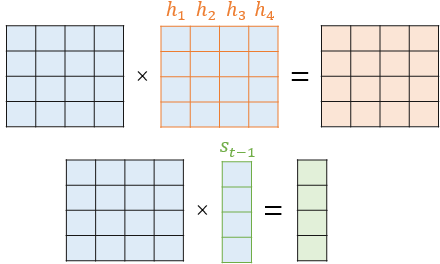  

이들을 더한 후 하이퍼볼릭탄젠트 함수를 지나도록 함  

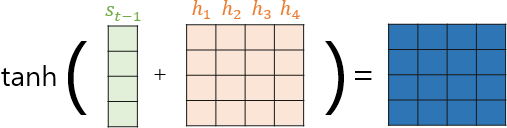  

진행된 연산의 수식은 다음과 같음

$$tanh(W_{b}s_{t-1}+W_{c}H)$$  

W_a^t와 곱하여 s_t-1와 h1, h2, h3, h4의 유사도가 기록된 어텐션 스코어 벡터 e^t를 얻음  

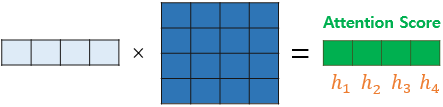  

$$e^{t} = W_{a}^{T}\ tanh(W_{b}s_{t-1}+W_{c}H)$$  

2. 소프트맥스(softmax) 함수를 통해 어텐션 분포(Attention Distribution)를 구함  

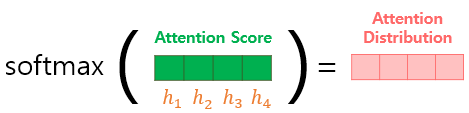  

e^t 에 소프트맥스 함수를 적용하여, 모든 값을 합하면 1이 되는 확률 분포를 얻어냄. 이를 어텐션 분포(Attention Distribution)라고 하며, 각각의 값은 어텐션 가중치(Attention Weight)라고 함  

3. 각 인코더의 어텐션 가중치와 은닉 상태를 가중합하여 어텐션 값(Attention Value)을 구함  

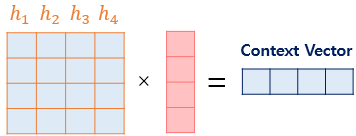  

- 정보들을 하나로 합치는 단계  
- 어텐션의 최종 결과값을 얻기 위해서 각 인코더의 은닉 상태와 어텐션 가중치값들을 곱하고, 최종적으로 모두 더함
- 가중합(Weighted Sum)을 하는 것과 같음. 컨텍스트 벡터(context vector)라고도 함

4. 컨텍스트 벡터로부터 s_t를 구함  

- 바다나우 어텐션 메커니즘에서는 컨텍스트 벡터와 현재 시점의 입력인 단어의 임베딩 벡터를 연결(concatenate)하고, 현재 시점의 새로운 입력으로 사용
- 이전 시점의 셀로부터 전달받은 은닉 상태 s_t-1와 현재 시점의 새로운 입력으로부터 s_t를 구함

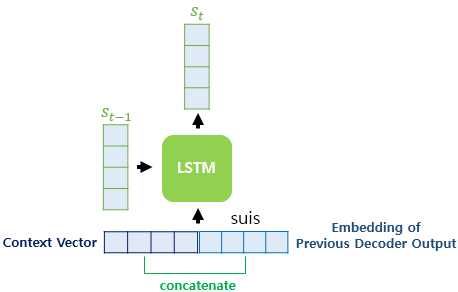  

이후에는 s_t는 출력층으로 전달되어 현재 시점의 예측값을 구함

In [1]:
#  IMDB 리뷰 데이터 전처리하기
from tensorflow.keras.datasets import imdb
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocab_size)

print('리뷰의 최대 길이 : {}'.format(max(len(l) for l in X_train)))
print('리뷰의 평균 길이 : {}'.format(sum(map(len, X_train))/len(X_train)))

2023-03-15 17:09:16.351958: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-15 17:09:16.511578: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-15 17:09:16.548862: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-15 17:09:17.268522: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


In [2]:
max_len = 500
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [3]:
# 바다나우 어텐션(Bahdanau Attention)

# 어텐션 스코어 함수란 주어진 query와 모든 key에 대해서 유사도를 측정하는 함수를 말함
# score(query, key) = V^t(tanh(W1key + W2query))

import tensorflow as tf

class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = Dense(units)
    self.W2 = Dense(units)
    self.V = Dense(1)

  def call(self, values, query): # key와 value는 같음
    # query shape == (batch_size, hidden size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden size)
    # score 계산을 위해 뒤에서 할 덧셈을 위해서 차원을 변경해줌
    hidden_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # self.V 에 score 를 적용하기 때문에 마지막 축에서 1을 얻습니다.
    # self.V 를 적용하기 전 텐서의 모양은 (batch_size, max_length, units)입니다.
    score = self.V(tf.nn.tanh(self.W1(values) + self.W2(hidden_with_time_axis)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [4]:
# 양방향 LSTM + 어텐션 메커니즘
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, Concatenate, Dropout
from tensorflow.keras import Input, Model
from tensorflow.keras import optimizers
import os

sequence_input = Input(shape=(max_len,), dtype='int32')
# 10,000개의 단어를 128차원의 벡터로 임베딩
embedded_sequences = Embedding(
    vocab_size, 128, input_length=max_len, mask_zero = True)(sequence_input)

lstm = Bidirectional(LSTM(64, dropout=0.5, return_sequences = True))(embedded_sequences)
lstm, forward_h, forward_c, backward_h, backward_c = Bidirectional(
    LSTM(64, dropout=0.5, return_sequences=True, return_state=True))(lstm)

print(lstm.shape, forward_h.shape, forward_c.shape, backward_h.shape, backward_c.shape)

# 순방향 LSTM의 은닉 상태와 셀상태를 forward_h, forward_c 에 저장
# 역방향 LSTM의 은닉 상태와 셀 상태를 backward_h, backward_c 에 저장
# 각 은닉 상태나 셀 상태의 lstm 은 (500 × 128)의 크기를 가짐
# foward 방향과 backward 방향이 연결된 hidden state 벡터가 모든 시점에 대해서 존재
# 양방향 LSTM을 사용할 경우에는 순방향과 역방향 LSTM 각각 은닉 상태와 
# 셀 상태를 가지므로 모두 사용하려면 두 방향의 LSTM의 상태들을 concatenate하면 됨
state_h = Concatenate()([forward_h, backward_h]) # 은닉 상태
state_c = Concatenate()([forward_c, backward_c]) # 셀 상태

# 은닉 상태를 입력으로 context vector 를 얻음
attention = BahdanauAttention(64) # 가중치 크기 정의
context_vector, attention_weights = attention(lstm, state_h)

# 컨텍스트 벡터를 밀집층(dense layer)에 통과시키고 이진 분류이므로 
# 최종 출력층에 1개의 뉴런을 배치하고 활성화 함수로 시그모이드 함수를 사용
dense1 = Dense(20, activation="relu")(context_vector)
dropout = Dropout(0.5)(dense1)
output = Dense(1, activation="sigmoid")(dropout)
model = Model(inputs=sequence_input, outputs=output)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 3, batch_size = 256, validation_data=(X_test, y_test), verbose=1)

print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

2023-03-15 17:10:32.245874: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-15 17:10:33.454613: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9637 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:5e:00.0, compute capability: 7.5
2023-03-15 17:10:33.455359: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 9636 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:af:00.0, compute capability: 7.5


(None, 500, 128) (None, 64) (None, 64) (None, 64) (None, 64)
Epoch 1/3


2023-03-15 17:10:49.180763: W tensorflow/core/common_runtime/forward_type_inference.cc:332] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: expected compatible input types, but input 1:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_INT32
    }
  }
}
 is neither a subtype nor a supertype of the combined inputs preceding it:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_FLOAT
    }
  }
}

	while inferring type of node 'cond_42/output/_24'


98/98 [==============================] - 329s 3s/step - loss: 0.5867 - accuracy: 0.7099 - val_loss: 0.5280 - val_accuracy: 0.7748
Epoch 2/3
98/98 [==============================] - 309s 3s/step - loss: 0.3845 - accuracy: 0.8556 - val_loss: 0.3346 - val_accuracy: 0.8583
Epoch 3/3
782/782 [==============================] - 246s 315ms/step - loss: 0.3158 - accuracy: 0.8694

 테스트 정확도: 0.8694
